In [1]:

import pandas as pd

In [5]:
df=pd.read_csv("stroke data.csv")

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
x="heart_disease"
y="stroke"

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df[x],df[y],test_size=0.2,random_state=42)

In [10]:
x_train

802     0
3927    0
2337    0
3910    0
1886    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: heart_disease, Length: 4088, dtype: int64

In [11]:
y_train

802     0
3927    0
2337    0
3910    0
1886    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 4088, dtype: int64

In [16]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
# fit the scaler on the training feature (needs 2D array), then inverse transform
x_train_reshaped = x_train.values.reshape(-1, 1)
x_train_scaled = scaler.fit_transform(x_train_reshaped)
x_train_original = scaler.inverse_transform(x_train_scaled)

# convert back to a Series with original index/name
x_train_original = pd.Series(x_train_original.ravel(), index=x_train.index, name=x_train.name)
x_train_original

802     0.0
3927    0.0
2337    0.0
3910    0.0
1886    0.0
       ... 
4426    0.0
466     0.0
3092    0.0
3772    0.0
860     0.0
Name: heart_disease, Length: 4088, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [37]:
regression=LinearRegression()
regression.fit(x_train_reshaped,y_train)

LinearRegression()

In [33]:
scores = cross_val_score(regression, x_train_reshaped, y_train, scoring='neg_mean_squared_error', cv=5)
Scores = -scores  # convert to positive MS


In [28]:
import numpy as np

In [32]:
np.mean(Scores)

0.04291939742864033

In [40]:
predict=regression.predict(x_train_reshaped)

In [42]:
predict

array([0.0392562, 0.0392562, 0.0392562, ..., 0.0392562, 0.0392562,
       0.0392562])

In [43]:
import seaborn as sns


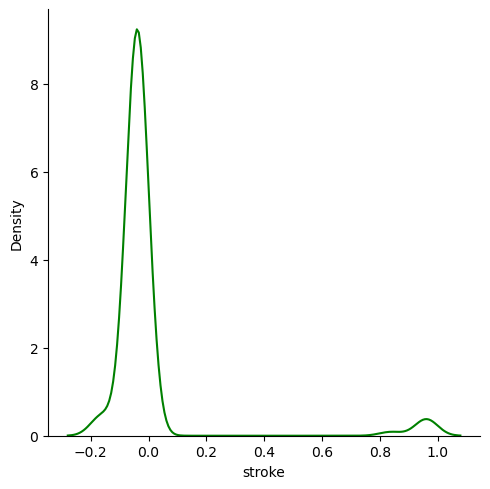

In [46]:
sns.displot(y_train - predict,color='green',kind='kde')

In [47]:
from sklearn.metrics import r2_score

In [48]:
score=r2_score(y_train,predict)
score

0.01728354139743582